In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

Text(0, 0.5, 'Count')

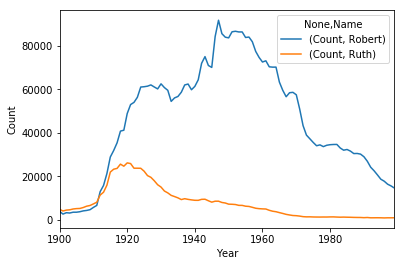

In [3]:
names_by_year = {}
for year in range(1900, 2000):
    path = f'names/yob{year}.txt'
    names_by_year[year] = pd.read_csv(path, names=['Name', 'Gender', 'Count'])
names_all = pd.concat(names_by_year).reset_index(level=1, drop=True)
Ruth = names_all[names_all['Name']=='Ruth']
Robert = names_all[names_all['Name']=='Robert']
Robert_Ruth = pd.concat([Ruth, Robert])
Robert_Ruth = Robert_Ruth.groupby([Robert_Ruth.index, 'Name']).sum()
Robert_Ruth.unstack('Name').plot()
plt.xlabel('Year')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

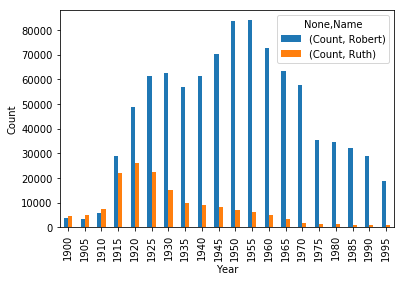

In [61]:
names_by_year = {}
for year in range(1900, 2000, 5):
    path = f'names/yob{year}.txt'
    names_by_year[year] = pd.read_csv(path, names=['Name', 'Gender', 'Count'])
names_all = pd.concat(names_by_year).reset_index(level=1, drop=True)
Ruth = names_all[names_all['Name']=='Ruth']
Robert = names_all[names_all['Name']=='Robert']
Robert_Ruth = pd.concat([Ruth, Robert])
Robert_Ruth = Robert_Ruth.groupby([Robert_Ruth.index, 'Name']).sum()
Robert_Ruth.unstack('Name').plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Count')

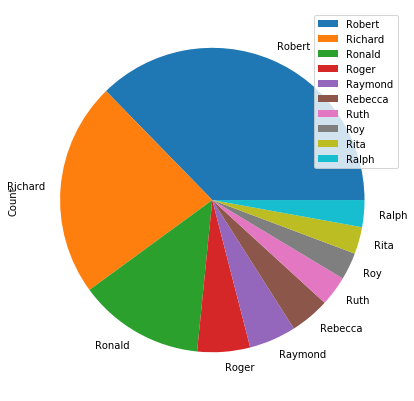

In [153]:
names1950 = pd.read_csv('names/yob1950.txt', names=['Name', 'Gender', 'Count'])
names1950 = names1950.set_index('Name')
R_names = [x for x in names1950.index if "R" in x]
names1950 = names1950.groupby(['Name']).sum()
names1950 = names1950.loc[names1950.index.isin(R_names)].sort_values('Count', ascending=False)[:10]
names1950.plot(kind='pie', y='Count', figsize=(7,7))

In [12]:
names_by_year = {}
for year in range(1900, 2000):
    path = f'names/yob{year}.txt'
    names_by_year[year] = pd.read_csv(path, names=['Name', 'Gender', 'Count'])
names_all = pd.concat(names_by_year)
names_all = names_all.groupby(['Name']).sum().sort_values('Count', ascending=False)
consonants = 'b, c, d, f, g, h, j, k, l, m, n, p, q, r, s, t, v, w, x, z'
names_all['Consonants_len'] = names_all.index.map(lambda x: sum([Counter(x.lower()).get(i, 0) for i in consonants]))

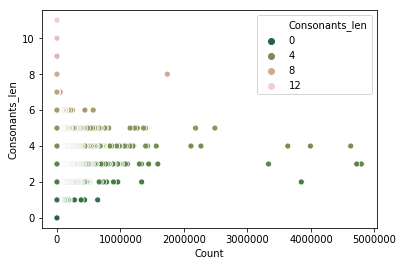

In [69]:
sns.scatterplot(x='Count', y='Consonants_len', data=names_all,)

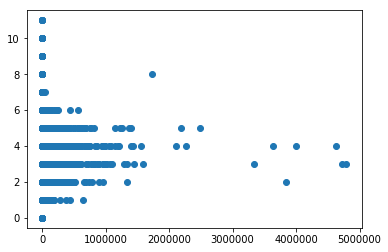

In [76]:
plt.scatter(x=names_all['Count'], y=names_all['Consonants_len'])